In [142]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keras.utils import to_categorical
from keras import Sequential
from keras import layers
from keras import optimizers

In [143]:
file_path = "C:/project_personal/python_test/2025-09-05-deeplearning/dataset/ptbdb_normal.csv"
file_path2 = "C:/project_personal/python_test/2025-09-05-deeplearning/dataset/ptbdb_abnormal.csv"
data_no = pd.read_csv(file_path)
data_ab = pd.read_csv(file_path2)

In [144]:
data_no = np.array(data_no)
data_ab = np.array(data_ab)

(4045, 188)


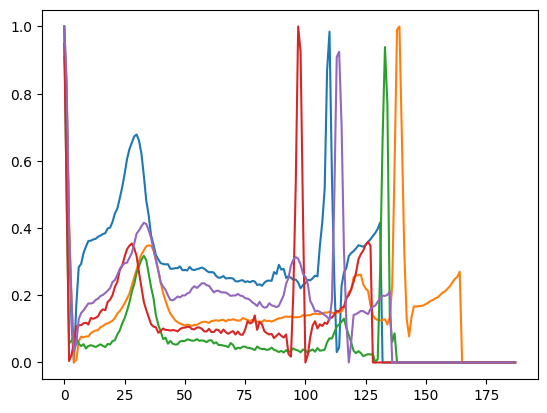

In [145]:
print(data_no.shape)
plt.plot(data_no[0,:])
plt.plot(data_no[1,:])
plt.plot(data_no[2,:])
plt.plot(data_no[4,:])
plt.plot(data_no[4044,:])


In [146]:
nTrain = 3000
nTest = 1000
x_train = np.concatenate((data_no[:nTrain,:], data_ab[:nTrain,:]),0)
y_train = np.concatenate((np.zeros(nTrain), np.ones(nTrain)),0)
x_test = np.concatenate((data_no[nTrain:nTrain+nTest,:], data_ab[nTrain:nTrain+nTest,:]),0)
y_test = np.concatenate((np.zeros(nTest), np.ones(nTest)),0)


In [147]:
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)

In [148]:
model = Sequential()

model.add(layers.Conv1D(filters=16, kernel_size=3, input_shape=(x_train.shape[1], 1), activation='relu'))
model.add(layers.Conv1D(filters=16, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=3, strides=2))

model.add(layers.Conv1D(filters=32, kernel_size=3, input_shape=(x_train.shape[1],1), activation='relu'))
model.add(layers.Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=3, strides=2))
# LSTM
model.add(layers.LSTM(16))
# CNN이 뽑아낸 특징 시퀀스를 LSTM으로 전달
# 시계열/순차적 의존성을 학습

##############9수정하기######################################################
model.add(layers.Dropout((0.3)))

# 출력층
model.add(layers.Dense(units=2, activation='softmax'))
# 이진 분류 (클래스 2개)

# 컴파일
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

c:\ProgramData\anaconda3\envs\py312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [149]:
model.fit(x_train ,y_train, epochs = 50, batch_size=128, validation_split=0.2)


Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.6544 - loss: 0.6360 - val_accuracy: 0.5200 - val_loss: 0.8518
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7085 - loss: 0.5865 - val_accuracy: 0.4700 - val_loss: 0.7908
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7190 - loss: 0.5716 - val_accuracy: 0.4183 - val_loss: 0.8154
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7233 - loss: 0.5686 - val_accuracy: 0.5042 - val_loss: 0.7250
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7223 - loss: 0.5578 - val_accuracy: 0.3317 - val_loss: 0.9536
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7385 - loss: 0.5409 - val_accuracy: 0.5242 - val_loss: 0.7373
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7335 - loss: 0.5451 - val_accuracy: 0.3667 - val_loss: 0.9359
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7415 - loss: 0.5416 - val_accuracy: 0.4858 - v

In [150]:
o = model.predict(x_test)
# The model outputs probabilities for two classes (normal, abnormal).
# np.argmax finds the class with the highest probability.
# 0 = normal, 1 = abnormal
predicted_classes = np.argmax(o, 1)

# Get the original test labels back from the one-hot encoding
actual_classes = np.argmax(y_test, 1)

# Print the first 20 predictions and actual labels to compare
print("Predictions:", predicted_classes[:20])
print("Actual Labels:", actual_classes[:20])

# Calculate and print the overall accuracy
accuracy = sum(np.equal(actual_classes, predicted_classes)) / len(actual_classes)
print("Model Accuracy:", accuracy)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
Actual Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Model Accuracy: 0.9575
